<a href="https://colab.research.google.com/github/tanisaur/forumla1-mini-sprint/blob/main/formula1_mini_sprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/tanisaur/forumla1-mini-sprint.git


fatal: destination path 'forumla1-mini-sprint' already exists and is not an empty directory.


Team 19:

We are creating a Hypothesis from Formula 1 Data Sets recruiting for a specic constructor by analyzing and focusing on Data from the following files:

*driver
*results
*lap times

We are going to do a basic analysis of the top ten drivers.

How many wins they have from the previous season for 2023?
The average race lap times for the 2023 per driver?



# **Import libraries**

In [2]:
pip install fastf1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fastf1 as ff1
%matplotlib inline

**Read in data**

In [4]:
# prompt:

import pandas as pd

driver_standings = pd.read_csv('//content/forumla1-mini-sprint/data/driver_standings.csv')
drivers = pd.read_csv('/content/forumla1-mini-sprint/data/drivers.csv')
results = pd.read_csv('/content/forumla1-mini-sprint/data/results.csv')
constructors = pd.read_csv('/content/forumla1-mini-sprint/data/constructors.csv')
races = pd.read_csv('/content/forumla1-mini-sprint/data/races.csv')


Fing the top 10 drivers base upon the points overall in history.


In [16]:
# Group the results by driver and calculate the sum of points
driver_points = results.groupby('driverId')['points'].sum()
# Sort the drivers by points in descending order
sorted_drivers = driver_points.sort_values(ascending=False)
# Print the top 5 drivers and their points
print(sorted_drivers.head(5))

driverId
1      4540.5
20     3098.0
830    2275.5
4      2203.0
8      1873.0
Name: points, dtype: float64


In [6]:
top_drivers = pd.merge(driver_standings, drivers, on='driverId')

top_drivers = top_drivers.groupby('driverId')['points'].sum()
top_drivers = top_drivers.sort_values(ascending=False).head(10)

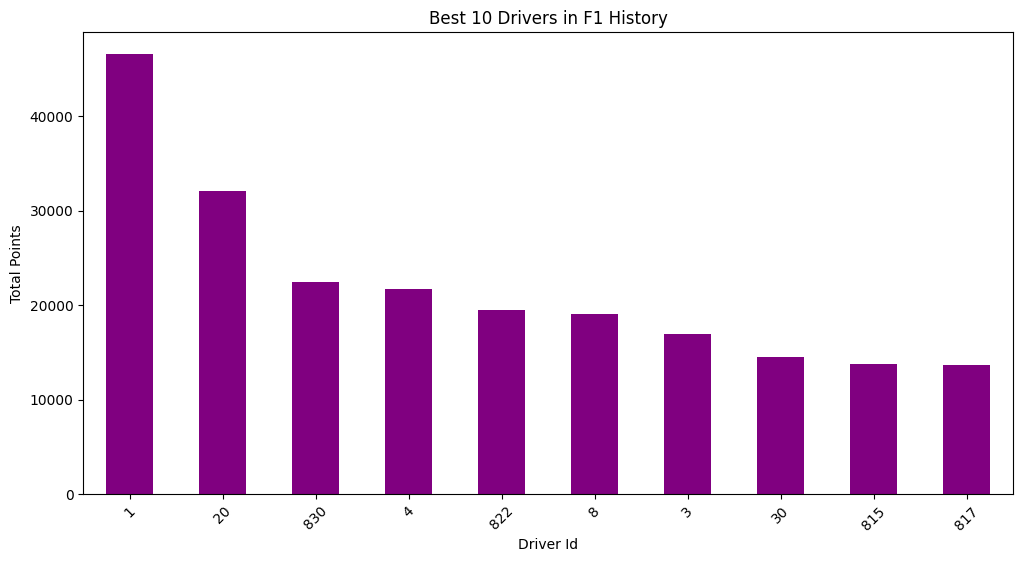

In [7]:
plt.figure(figsize=(12, 6))
top_drivers.plot(kind='bar', color='purple')
plt.xlabel('Driver Id')
plt.ylabel('Total Points')
plt.title('Best 10 Drivers in F1 History')
plt.xticks(rotation=45)
plt.show()

**2023 Standings**

In [8]:
#Selected columns
drivers = drivers[["driverId", "driverRef", "nationality"]]
driver_standings = driver_standings[['driverId','raceId','driverStandingsId', 'points', 'position', 'wins']]

# Merge the DataFrames on the specified columns
combined_driver_info = pd.merge(driver_standings, drivers, on=['driverId'])

# Display the combined DataFrame
combined_driver_info

,driverId,raceId,driverStandingsId,points,position,wins,driverRef,nationality
0,1,18,1,10.0,1,1,hamilton,British
1,1,19,9,14.0,1,1,hamilton,British
2,1,20,27,14.0,3,1,hamilton,British
3,1,21,48,20.0,2,1,hamilton,British
4,1,22,69,28.0,3,1,hamilton,British
...,...,...,...,...,...,...,...,...
34119,858,1106,72077,0.0,20,0,sargeant,American
34120,858,1107,72117,0.0,19,0,sargeant,American
34121,858,1108,72137,0.0,19,0,sargeant,American
34122,858,1109,72157,0.0,19,0,sargeant,American


In [9]:
#Obtain last year races
races_2023 = races[races['year'] == 2023]
races_2023 = races_2023[['raceId','year','circuitId','name']]
races_2023

,raceId,year,circuitId,name
1079,1098,2023,3,Bahrain Grand Prix
1080,1099,2023,77,Saudi Arabian Grand Prix
1081,1100,2023,1,Australian Grand Prix
1082,1101,2023,73,Azerbaijan Grand Prix
1083,1102,2023,79,Miami Grand Prix
1084,1104,2023,6,Monaco Grand Prix
1085,1105,2023,4,Spanish Grand Prix
1086,1106,2023,7,Canadian Grand Prix
1087,1107,2023,70,Austrian Grand Prix
1088,1108,2023,9,British Grand Prix


In [10]:
#include only the following columns in results
new_results = results[['raceId','constructorId','laps','time','milliseconds','rank','fastestLapTime', 'fastestLapSpeed']]
new_results.head()

,raceId,constructorId,laps,time,milliseconds,rank,fastestLapTime,fastestLapSpeed
0,18,1,58,1:34:50.616,5690616,2,1:27.452,218.300
1,18,2,58,+5.478,5696094,3,1:27.739,217.586
2,18,3,58,+8.163,5698779,5,1:28.090,216.719
3,18,4,58,+17.181,5707797,7,1:28.603,215.464
4,18,1,58,+18.014,5708630,1,1:27.418,218.385


In [11]:
# Merge combined_driver_info and races_2023 on the 'raceId' column
new_dataset = pd.merge(combined_driver_info, races_2023, on='raceId')

# Merge the resulting DataFrame with new_results on the 'raceId' column
new_dataset = pd.merge(new_dataset, new_results, on='raceId')

# Display the head of the new_dataset
new_dataset.head()

,driverId,raceId,driverStandingsId,points,position,wins,driverRef,nationality,year,circuitId,name,constructorId,laps,time,milliseconds,rank,fastestLapTime,fastestLapSpeed
0,1,1098,72010,10.0,5,0,hamilton,British,2023,3,Bahrain Grand Prix,9,57,1:33:56.736,5636736,6,1:36.236,202.452
1,1,1098,72010,10.0,5,0,hamilton,British,2023,3,Bahrain Grand Prix,9,57,+11.987,5648723,7,1:36.344,202.225
2,1,1098,72010,10.0,5,0,hamilton,British,2023,3,Bahrain Grand Prix,117,57,+38.637,5675373,5,1:36.156,202.620
3,1,1098,72010,10.0,5,0,hamilton,British,2023,3,Bahrain Grand Prix,6,57,+48.052,5684788,14,1:37.130,200.588
4,1,1098,72010,10.0,5,0,hamilton,British,2023,3,Bahrain Grand Prix,131,57,+50.977,5687713,10,1:36.546,201.802


In [12]:
most_wins_driver = new_dataset.groupby('driverRef')['wins'].sum().sort_values(ascending=False).index[0]
print(f"Driver with the most wins in 2023: {most_wins_driver}")

Driver with the most wins in 2023: max_verstappen


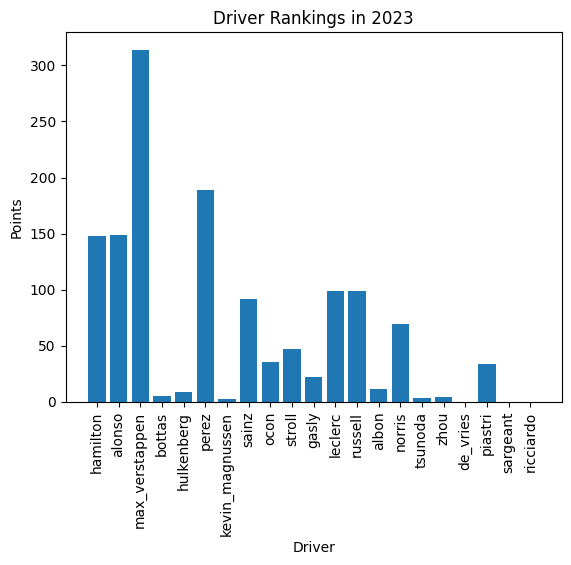

In [14]:
# Extract the required data from new_dataset
driver_names = new_dataset['driverRef'].tolist()
driver_ranks = new_dataset['points'].tolist()

# Create the bar chart
plt.bar(driver_names, driver_ranks)

# Add labels and title
plt.xlabel("Driver")
plt.ylabel("Points")
plt.title("Driver Rankings in 2023")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()